In [1]:
%cd /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5 

/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5


In [2]:
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def rename_df_cols(df):
    old_cols = list(df.columns)
    new_cols = ['epoch', 'train/box_loss', 'train/obj_loss',
       'train/cls_loss', 'metrics/precision', 'metrics/recall',
       'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss',
       'val/obj_loss', 'val/cls_loss', '/lr0', 'x/lr1', 'x/lr2']
    aux = dict(zip(old_cols, new_cols))
    df = df.rename(columns=aux)
    return df

def plot_losses(df_results):
    df_results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Cls_loss")
    #plt.show()

## Training dataset preparation

In [4]:
!cat /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml

train: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/train
val: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/val
test: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/test

nc: 2

names: ['s_svd', 's_soc']

In [34]:
data_path = '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml'

## Model training: base model

In [5]:
model_name = 'b16_e150_f12'

In [6]:
'''!python train.py --batch 16 \
--epochs 150 \
--data {data_path} \
--weights yolov5s6.pt \
--cache \
--freeze 12 \
--project Norway \
--name {model_name}'''

train: weights=yolov5s6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=b16_e150_f12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 185 (delta 82), reused 113 (delta 61), pack-reused 11
Receiving objects: 100% (185/185), 255.09 KiB | 8.23 MiB/s, done.
Resolving deltas: 100% (84/84), completed wi

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/labels/train.cache
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 299.09
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/labels/val.cache
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 107.89it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b16_e150_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to N

     21/149      1.76G    0.06359     0.0184   0.008005         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.488      0.531       0.53      0.226

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/149      1.76G    0.06016    0.01565   0.007012         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.606      0.472      0.495      0.187

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/149      1.76G    0.06007    0.01427   0.006439         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.586      0.515      0.515      0.228

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/14

     46/149      1.76G    0.04274    0.01217   0.002496         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.845      0.704      0.785      0.314

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/149      1.76G    0.03842    0.01033   0.002342         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.727      0.728      0.716      0.446

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/149      1.76G    0.04157    0.01038   0.003036         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.773      0.744      0.775      0.397

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/14

     71/149      1.76G    0.03056    0.01012   0.001991         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.938      0.806      0.855      0.552

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/149      1.76G    0.03409   0.009988   0.002057         35        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.796      0.842       0.45

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/149      1.76G    0.03235    0.01086   0.002703         54        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.793      0.855      0.499

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/14

     96/149      1.76G    0.02661   0.007739   0.001341         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.823      0.853      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/149      1.76G    0.02547   0.008571   0.001411         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.952      0.829      0.864       0.59

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/149      1.76G    0.02625   0.008767   0.001586         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.965      0.826      0.864      0.623

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/14

    121/149      1.76G    0.02175   0.008082   0.001416         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.954      0.837      0.878      0.637

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/149      1.76G    0.02196   0.007557   0.001428         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.953      0.838      0.878      0.622

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/149      1.76G    0.02208   0.009345   0.001032         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.837      0.879      0.656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/14

    146/149      1.76G    0.01747   0.009267   0.001168         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.812      0.862      0.645

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/149      1.76G    0.01712   0.008767  0.0007008         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.811      0.862      0.647

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/149      1.76G    0.01697   0.009058  0.0008109         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.963      0.813      0.862      0.651

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/14

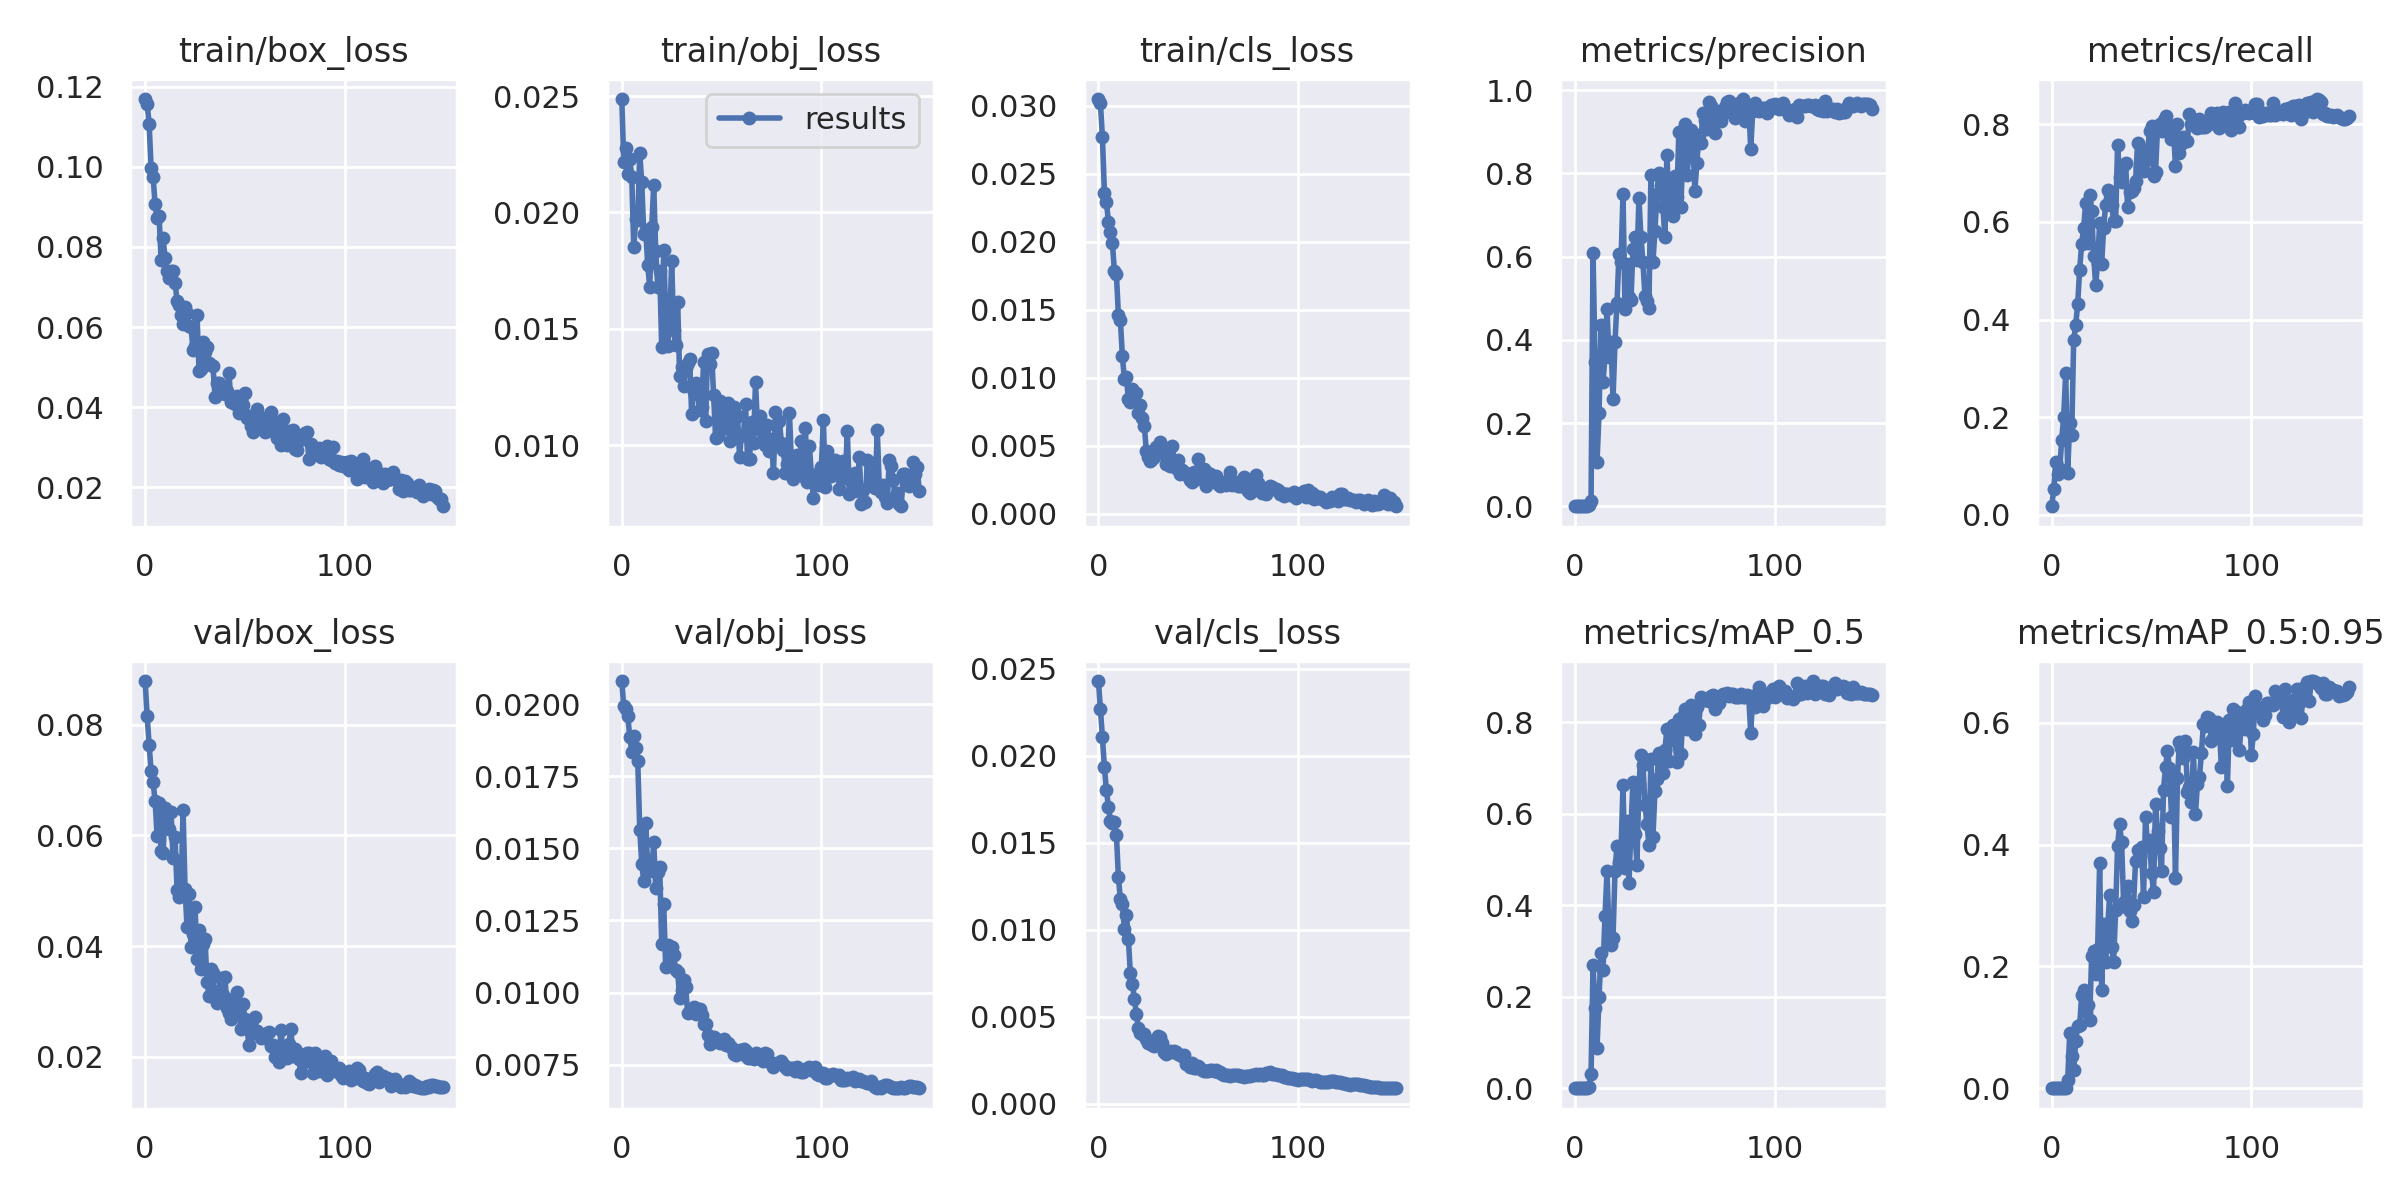

In [7]:
display.Image(f"Norway/b16_e150_f12/results.png")

### Results evaluation

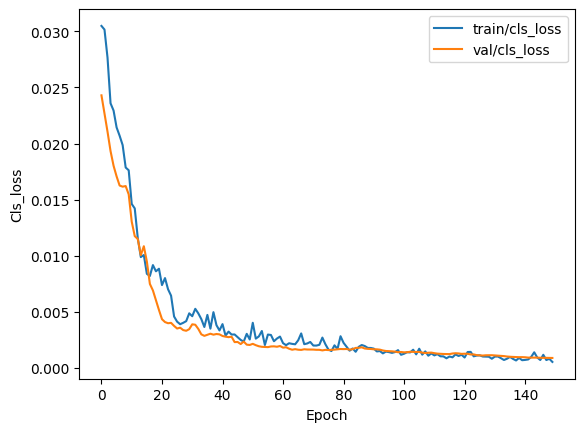

In [8]:
# Put results in a dataframe 
results_csv_path = 'Norway/b16_e150_f12/results.csv'
results = rename_df_cols(pd.read_csv(results_csv_path))

# PLot
plot_losses(results)
plt.show()

### Fine tune: batch size

In [14]:
# Set batch size 

batch_s = [32,64]
'''
for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5s6.pt \
    --cache \
    --freeze 12 \
    --project Norway \
    --name {model_name}'''

**************TRAINING MODEL b32_e200_f12*********
train: weights=yolov5s6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=b32_e200_f12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 27 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentu

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 275.58
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 64.20it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b32_e200_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b32_e200_f12
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      1.47G     0.1228    0.02381    0.03198         97        640: 1
                 Class     Images  In

     22/199      2.36G    0.06525     0.0145   0.008308         66        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.445      0.506      0.435      0.185

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      2.36G    0.07122    0.01751   0.008275        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.313      0.571      0.259      0.101

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      2.36G    0.06855    0.01892   0.007561        111        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.308      0.489      0.284      0.119

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     25/19

     47/199      2.36G    0.04347    0.01205    0.00403         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.493      0.727      0.633      0.331

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      2.36G    0.04153    0.01161   0.003054         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.568       0.66      0.586      0.297

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/199      2.36G    0.04538     0.0107   0.002747         74        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.629      0.763      0.682      0.294

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/19

     72/199      2.36G    0.03319    0.01023   0.002833        142        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.948      0.767      0.852      0.548

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      2.36G    0.03604    0.01098   0.002354         56        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.954      0.771      0.851      0.559

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/199      2.36G    0.03598    0.01052   0.002178         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.947      0.751      0.832      0.582

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/19

     97/199      2.36G    0.03171   0.009521   0.001778         83        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.946      0.826      0.881      0.592

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      2.36G    0.02929   0.008451   0.002163         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.94      0.826      0.871      0.613

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/199      2.36G     0.0276   0.009547   0.001921        121        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.939      0.819      0.866      0.479

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/19

    122/199      2.36G    0.02371   0.007891   0.001375         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.821      0.882      0.643

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      2.36G    0.02369   0.007449   0.001413         71        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.959      0.833      0.883      0.626

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/199      2.36G    0.02535   0.009119   0.001186         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.833      0.882      0.635

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/19

    147/199      2.36G     0.0215   0.008265   0.001342        110        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.881      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      2.36G    0.02111   0.007165  0.0009529         63        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.807      0.874      0.673

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/199      2.36G    0.02149   0.008555  0.0009278        114        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.873      0.678

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    150/19

    172/199      2.36G    0.01749   0.007269  0.0008103         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.801      0.871      0.654

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      2.36G    0.01702    0.00824   0.000595         97        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.801      0.856      0.652

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/199      2.36G    0.01785   0.007087  0.0006956         69        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.801      0.857      0.661

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    175/19

    197/199      2.36G    0.01549   0.007219  0.0004726         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.807      0.885      0.668

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      2.36G    0.01509   0.007795  0.0004414        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.885      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/199      2.36G    0.01635   0.007525  0.0005143        116        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.889      0.669

200 epochs completed in 0.082 hours.
Optimizer stripped from Norway/b32_e200_f12/weights

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 298.50
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 87.07it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b64_e200_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b64_e200_f12
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      2.31G     0.1221    0.02354    0.03121        224        640: 1
                 Class     Images  In

     22/199      3.07G    0.06895    0.01957    0.01579        183        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.746      0.375       0.45      0.121

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      3.07G    0.07037    0.02238    0.01499        281        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.463      0.422      0.325      0.109

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      3.07G    0.06996    0.02103     0.0147        187        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.322       0.44      0.223     0.0765

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     25/19

     47/199      3.07G    0.05701    0.01411   0.005361        185        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.554      0.481      0.493      0.237

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      3.07G    0.05303    0.01441   0.005848        251        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.544      0.562      0.488      0.152

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/199      3.07G     0.0553    0.01492   0.005427        244        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.522      0.623      0.528      0.192

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/19

     72/199      3.07G    0.03985    0.01329   0.002929        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.634      0.799      0.614      0.277

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      3.07G    0.03981   0.009807   0.003176        157        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.89      0.677      0.796      0.467

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/199      3.07G    0.04348    0.01081   0.003322        211        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.823      0.737      0.803      0.457

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/19

     97/199      3.07G    0.03179   0.009585    0.00178        299        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.949      0.808      0.846      0.472

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      3.07G    0.03172    0.01027    0.00242        263        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.882      0.817      0.844       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/199      3.07G    0.03223   0.009996    0.00193        253        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.956      0.811      0.837      0.544

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/19

    122/199      3.07G     0.0271    0.00793   0.001356        235        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.919      0.823      0.864      0.599

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      3.07G    0.02743    0.01062   0.001553        306        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.943      0.839      0.875      0.536

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/199      3.07G     0.0277    0.01006   0.001593        298        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.939      0.823      0.853      0.553

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/19

    147/199      3.07G    0.02227   0.007855   0.001282        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.808       0.86       0.62

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      3.07G    0.02209   0.008986   0.001126        289        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.808      0.865      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/199      3.07G    0.02064   0.008253   0.001128        196        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.814      0.864      0.638

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    150/19

    172/199      3.07G    0.01916   0.008266  0.0007964        234        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.955      0.835      0.878      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      3.07G    0.01891   0.007464  0.0009045        218        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.95      0.836      0.879      0.643

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/199      3.07G    0.01768   0.007487  0.0007075        229        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.944      0.839      0.879      0.625

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    175/19

    197/199      3.07G    0.01678   0.007248  0.0004442        278        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.825      0.879      0.658

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      3.07G    0.01587   0.008243  0.0004999        204        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.823      0.879      0.658

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/199      3.07G    0.01558   0.007323  0.0005409        188        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.971      0.821       0.88      0.664

200 epochs completed in 0.067 hours.
Optimizer stripped from Norway/b64_e200_f12/weights

In [16]:
# Read results
results_b32 = rename_df_cols(pd.read_csv(f'Norway/b32_e200_f12/results.csv'))
# PLot
#plot_losses(results_b32)

In [17]:
# Read results
results_b64 = rename_df_cols(pd.read_csv(f'Norway/b64_e200_f12/results.csv'))
# PLot
#plot_losses(results_b64)

### Plot: batch size comparision 

Text(0.5, 1.0, 'base_two_clases_b64_e150_f12')

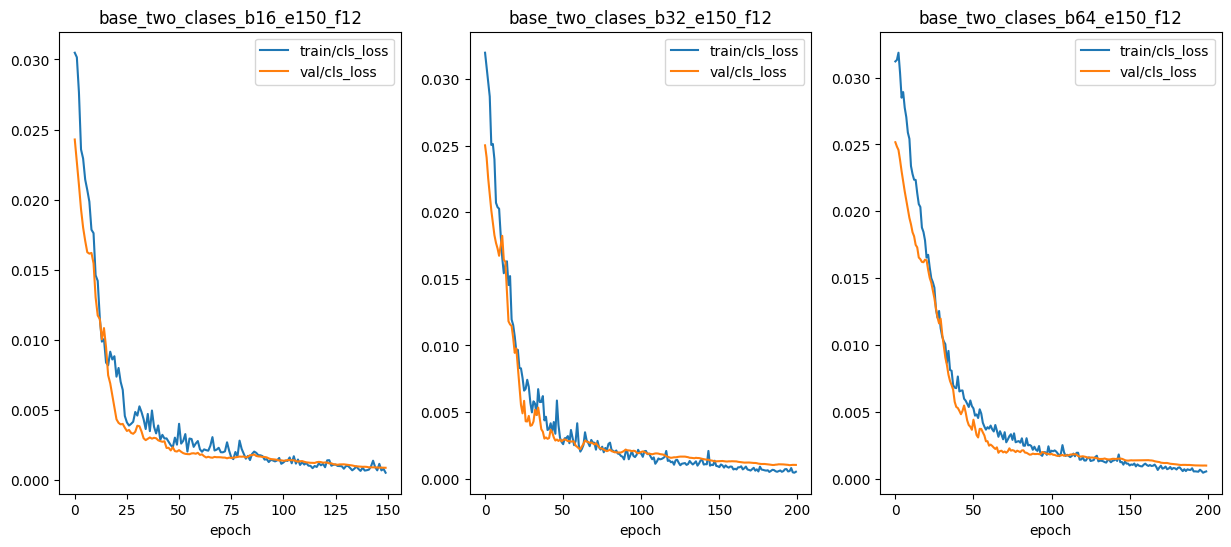

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('base_two_clases_b16_e150_f12')
axes[1].set_title('base_two_clases_b32_e150_f12')
axes[2].set_title('base_two_clases_b64_e150_f12')

# Set common labels
#fig.supxlabel('fig.supxlabel')
#fig.supylabel('fig.supylabel')

In [19]:
results.columns

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       '/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')

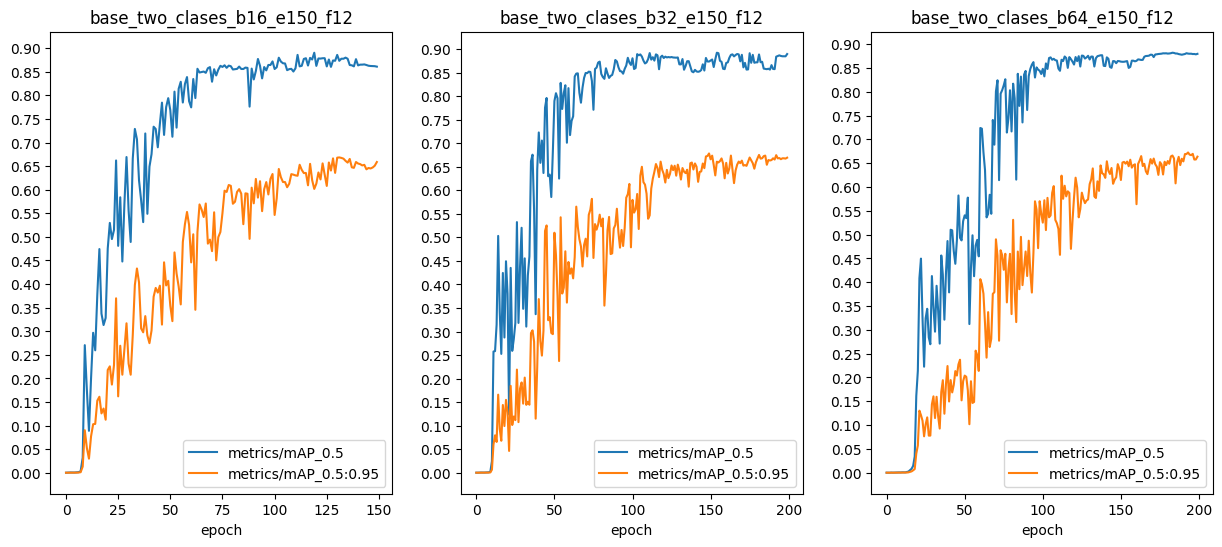

In [25]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[2])

# Set individual title 
axes[0].set_title('base_two_clases_b16_e150_f12')
axes[1].set_title('base_two_clases_b32_e150_f12')
axes[2].set_title('base_two_clases_b64_e150_f12')

axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[2].yaxis.set_major_locator(ticker.MultipleLocator(0.05))


# Set common labels
#fig.supxlabel('fig.supxlabel')
#fig.supylabel('fig.supylabel')

In [32]:
print(results['metrics/mAP_0.5'].max())
print(results['metrics/mAP_0.5:0.95'].max())

print(results_b32['metrics/mAP_0.5'].max())
print(results_b32['metrics/mAP_0.5:0.95'].max())

print(results_b64['metrics/mAP_0.5'].max())
print(results_b64['metrics/mAP_0.5:0.95'].max())

0.89037
0.66842
0.89222
0.67823
0.8819
0.67245


#### Okay, the best model is with batch 32

## Medium model 

In [35]:
# Set batch size 

batch_s = [16,32,64]

for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12_v5m6'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Norway \
    --name {model_name}

**************TRAINING MODEL b16_e200_f12_v5m6*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=b16_e200_f12_v5m6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), 16.49 KiB | 1.27 MiB/s, don

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 298.31
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 112.75it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b16_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b16_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      1.44G     0.1135    0.02603    0.02819         32        640: 1
                 Class     

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.489      0.663      0.492      0.205

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      2.78G    0.05747    0.01387   0.006231         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.47      0.702      0.525      0.249

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      2.78G    0.05493    0.01259   0.005713         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.549      0.702       0.57      0.278

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      2.78G    0.04925    0.01316   0.004506         18        640: 1
          

     46/199      2.78G    0.03725     0.0102   0.002885         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.731      0.821      0.785      0.428

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      2.78G     0.0336     0.0087   0.003449         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.636      0.813      0.683      0.341

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      2.78G    0.03962   0.008659    0.00338         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.773      0.841      0.778      0.423

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      2.78G    0.02935   0.008207   0.001919         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.798      0.882      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      2.78G    0.03112   0.008306   0.002351         35        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.795      0.888      0.544

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      2.78G    0.03156   0.008987   0.002568         54        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.874      0.835      0.879      0.548

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      2.78G    0.02515   0.006496   0.001301         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.861      0.891      0.633

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      2.78G    0.02344   0.006918   0.001449         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.941      0.847      0.891       0.64

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      2.78G    0.02443   0.007206   0.001634         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.957      0.854      0.898      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      2.78G    0.02072   0.006503   0.001446         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.988      0.832      0.901      0.654

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      2.78G    0.02239   0.006187   0.001308         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.832      0.894      0.607

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      2.78G    0.02129   0.007625    0.00121         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986       0.83      0.888      0.646

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      2.78G    0.01831   0.007352   0.001122         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.849      0.889      0.683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      2.78G    0.01801   0.006906  0.0009593         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.952       0.85       0.89      0.683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      2.78G    0.01709   0.006766  0.0009095         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.844      0.891      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      2.78G    0.01398   0.005566  0.0005951         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.964      0.837      0.899      0.705

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      2.78G    0.01431   0.006043  0.0005686         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.978      0.826      0.895       0.69

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      2.78G     0.0138   0.005757  0.0006704         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.838      0.895      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      2.78G     0.0116   0.006417  0.0005826         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.816      0.894      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      2.78G    0.01266   0.005599  0.0005441         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.825      0.894      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      2.78G    0.01191   0.005794  0.0005388         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.98      0.826      0.893      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 289.02
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 62.61it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b32_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b32_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1192    0.02511     0.0291         97        640: 1
                 Class     

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.334      0.679      0.365      0.144

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      4.15G    0.06052    0.01386   0.008953         66        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.514      0.617      0.553      0.239

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      4.15G    0.06143    0.01711   0.009202        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.397      0.592       0.39      0.136

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      4.15G    0.06257    0.01683   0.008421        111        640: 1
          

     46/199      4.15G     0.0418    0.01023   0.003868         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.656      0.704      0.738      0.346

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      4.15G    0.04114    0.01028    0.00349         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.618      0.744       0.71      0.422

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G    0.04083    0.01006   0.003301         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.741      0.804      0.811       0.47

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      4.15G    0.03291   0.008427   0.001911         67        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.989      0.842      0.906      0.575

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      4.15G    0.03003   0.008705   0.002306        142        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.959      0.842      0.904      0.581

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.03135   0.009236   0.002157         56        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.796      0.844      0.808      0.559

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      4.15G    0.02752   0.007001   0.001661        139        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.909      0.876        0.9      0.612

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      4.15G    0.02836   0.007682   0.001628         83        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.912      0.886      0.903      0.614

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.02515   0.006844    0.00187         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.921      0.882        0.9      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      4.15G    0.02277   0.006693   0.001336        103        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.859      0.907      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      4.15G    0.02282    0.00663    0.00164         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.992      0.823      0.909      0.628

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G    0.02126   0.006211   0.001719         71        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.822      0.909      0.624

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      4.15G    0.01759      0.007   0.001094        118        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.893       0.91       0.68

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      4.15G    0.01761   0.006491  0.0008863        110        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.93      0.897      0.911      0.679

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G    0.01686   0.005825  0.0008244         63        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.886      0.905      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      4.15G    0.01397   0.006167  0.0006606         98        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.938      0.866      0.909      0.688

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      4.15G    0.01488    0.00579  0.0007606         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.936      0.865      0.911      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G    0.01442   0.006671  0.0005791         97        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.869      0.912      0.704

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      4.15G    0.01399   0.005539  0.0005943         79        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.909      0.893       0.91      0.715

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      4.15G    0.01148   0.005645  0.0004581         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.914      0.893       0.91      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.01127   0.006062  0.0004566        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.891       0.91      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 292.24
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 111.51it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b64_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b64_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      4.14G     0.1186    0.02457    0.02907        224        640: 1
                 Class     

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95     0.0414      0.208     0.0376     0.0115

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      5.68G    0.06506    0.02037    0.01522        183        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95     0.0853      0.234     0.0669     0.0198

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      5.68G    0.06691    0.02254    0.01424        281        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95     0.0784       0.16     0.0621     0.0215

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      5.68G    0.06137    0.02149    0.01354        187        640: 1
          

     46/199      5.68G    0.05887     0.0124   0.005271        197        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.567      0.725      0.576      0.247

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      5.68G    0.05037    0.01304   0.005795        185        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.436      0.717       0.46      0.222

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      5.68G    0.04898    0.01289    0.00612        251        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.486      0.744      0.535      0.219

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      5.68G     0.0354   0.009183   0.002239        175        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.722      0.763      0.737      0.465

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      5.68G    0.03581    0.01163    0.00275        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.797      0.787      0.836      0.515

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      5.68G    0.03525   0.008612   0.002602        157        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.866      0.805      0.851      0.528

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      5.68G    0.02951   0.008386   0.002297        290        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.96      0.872      0.899      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      5.68G     0.0273    0.00827   0.002233        299        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.94      0.859      0.896      0.519

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      5.68G    0.02817   0.008896   0.002339        263        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.973      0.844      0.894      0.617

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      5.68G    0.02248   0.006846   0.001449        256        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.831      0.897      0.671

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      5.68G    0.02391   0.006609   0.001508        235        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.977      0.832      0.898      0.681

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      5.68G    0.02274   0.008733   0.001663        306        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.912       0.88      0.899      0.655

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      5.68G    0.01882   0.006368   0.001121        178        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.858      0.893       0.67

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      5.68G    0.02002   0.006498   0.001548        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.819      0.894      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      5.68G    0.01956   0.007078  0.0009958        289        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.819      0.894      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      5.68G    0.01533   0.005958  0.0007291        201        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.985      0.834      0.898      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      5.68G    0.01609    0.00679  0.0008153        234        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.825      0.895      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      5.68G    0.01438   0.005904   0.000828        218        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.825      0.893      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      5.68G    0.01202    0.00547  0.0006405        192        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961       0.84      0.896      0.709

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      5.68G    0.01307    0.00586  0.0005267        278        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.839      0.895      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      5.68G     0.0125   0.006759  0.0005881        204        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.822      0.895      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

In [36]:
# Read results
results_b16_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b16_e200_f12_v5m6/results.csv'))
results_b32_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b32_e200_f12_v5m6/results.csv'))
results_b64_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b64_e200_f12_v5m6/results.csv'))

Text(0.5, 1.0, 'b64_e150_f12_v5m6')

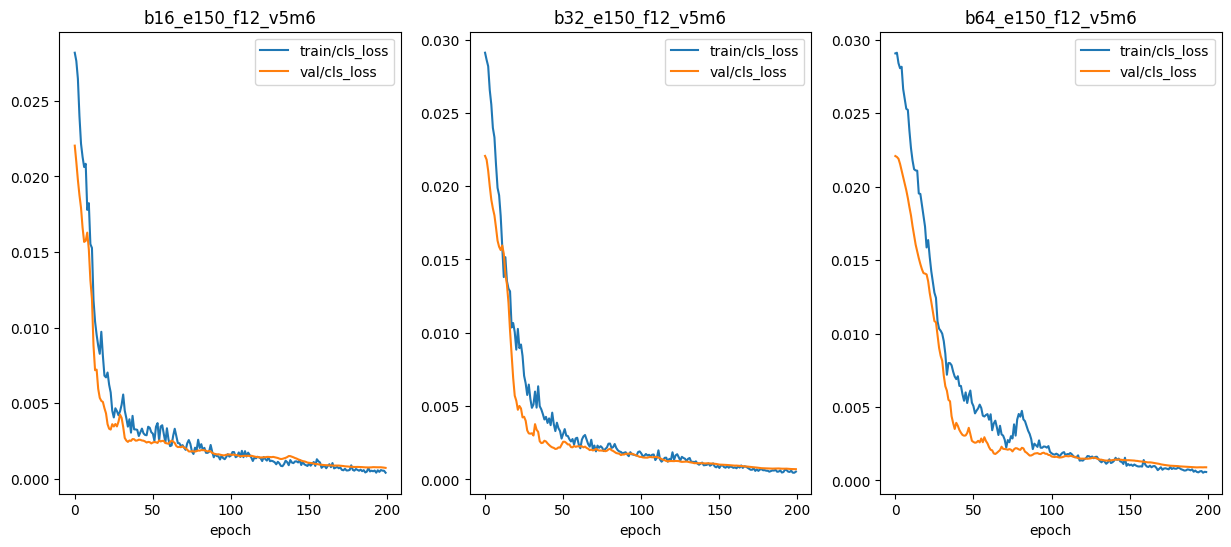

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('b16_e150_f12_v5m6')
axes[1].set_title('b32_e150_f12_v5m6')
axes[2].set_title('b64_e150_f12_v5m6')

In [39]:
print(results_b16_v5m6['metrics/mAP_0.5'].max())
print(results_b16_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b32_v5m6['metrics/mAP_0.5'].max())
print(results_b32_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b64_v5m6['metrics/mAP_0.5'].max())
print(results_b64_v5m6['metrics/mAP_0.5:0.95'].max())

0.90671
0.71014
0.91678
0.71956
0.90582
0.71818


## Best model so far: b32_e150_f12_v5m6